__<h1>Importing Libraries and Dataset</h1>__

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [175]:
df = pd.read_csv(r"C:\Users\harsh\Downloads\Training Data.csv")

__<h1>Understanding the data</h1>__

In [7]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [8]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [10]:
#To check whether we have any duplicate values in dataset 
df.duplicated().value_counts

<bound method IndexOpsMixin.value_counts of 0         False
1         False
2         False
3         False
4         False
          ...  
251995    False
251996    False
251997    False
251998    False
251999    False
Length: 252000, dtype: bool>

In [11]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [12]:
#To check whether we have any null values
df.isnull().sum()


Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

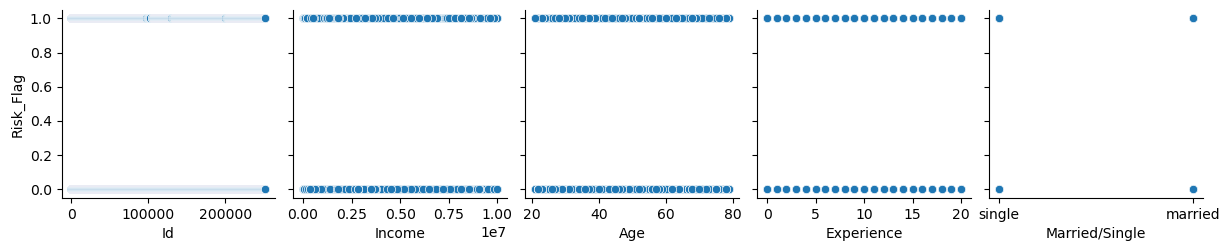

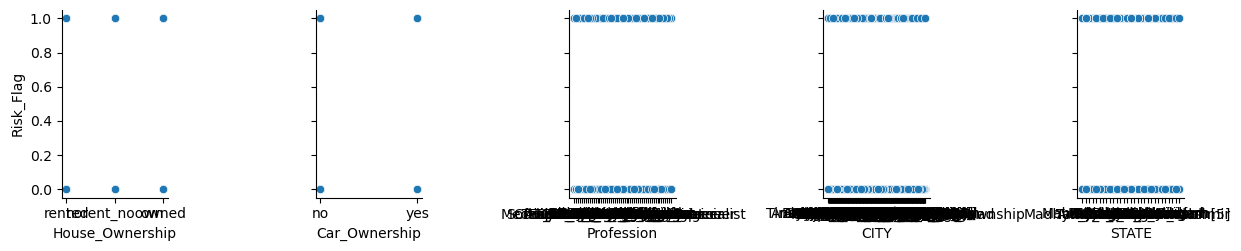

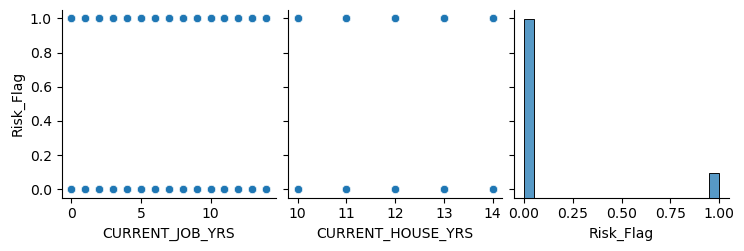

In [20]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['Risk_Flag'])

__<h1>Data Cleaning and Preprocessing</h1>__

In [28]:
def unclean_names(col):
    unclean_names=[]
    for name in df[str(col)].unique():
        if name.endswith(']'):
            unclean_names.append(name)
    return unclean_names

unclean_city_names = unclean_names('CITY')
unclean_city_names

['Tiruchirappalli[10]',
 'Kota[6]',
 'Hajipur[31]',
 'Erode[17]',
 'Anantapuram[24]',
 'Aurangabad[39]',
 'Purnia[26]',
 'Eluru[25]',
 'Siwan[32]',
 'Motihari[34]',
 'Warangal[11][12]',
 'Jehanabad[38]',
 'Kishanganj[35]',
 'Tirupati[21][22]',
 'Kurnool[18]',
 'Kadapa[23]',
 'Jammu[16]',
 'Rajahmundry[19][20]',
 'Saharsa[29]',
 'Jamalpur[36]',
 'Dehri[30]',
 'Nellore[14][15]',
 'Visakhapatnam[4]',
 'Buxar[37]',
 'Ramagundam[27]',
 'Sasaram[30]',
 'Guntur[13]',
 'Chittoor[28]',
 'Bettiah[33]',
 'Mysore[7][8][9]']

In [29]:
unclean_state_names = unclean_names('STATE')
unclean_state_names

['Uttar_Pradesh[5]']

In [31]:
def clean_df(df,col,unclean_list):
    for index,name in enumerate(df[col]):
        if name in unclean_list:
            if name.endswith(']'):
                name_ = name.strip('[]0123456789')
                df[col].iloc[index]==name_
               
            
            

clean_df(df,'STATE',unclean_state_names)
clean_df(df,'CITY',unclean_city_names)


In [32]:
df['CITY']

0                        Rewa
1                    Parbhani
2                   Alappuzha
3                 Bhubaneswar
4         Tiruchirappalli[10]
                 ...         
251995                Kolkata
251996                   Rewa
251997        Kalyan-Dombivli
251998            Pondicherry
251999                  Avadi
Name: CITY, Length: 252000, dtype: object

__<h1>Checking For any Outliers</h1>__

<Axes: >

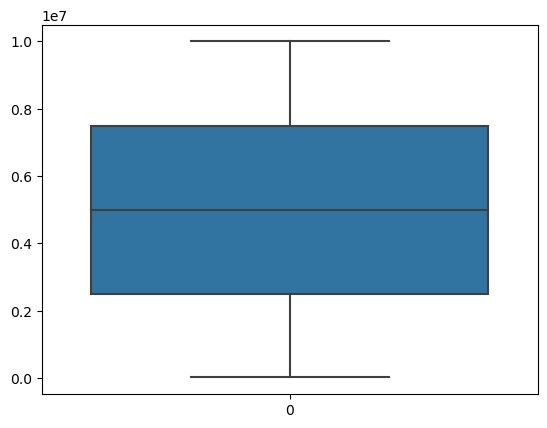

In [34]:
sns.boxplot(df['Income'])

<Axes: >

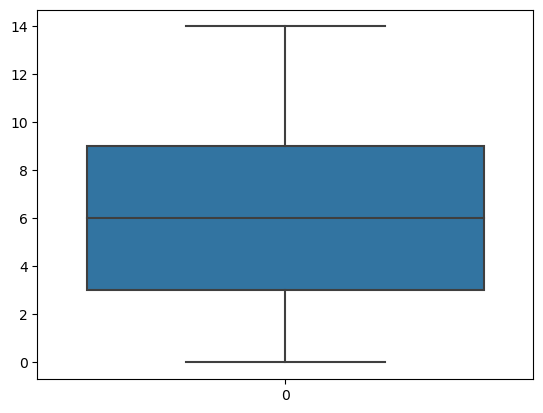

In [38]:
sns.boxplot(df['CURRENT_JOB_YRS'])

<Axes: >

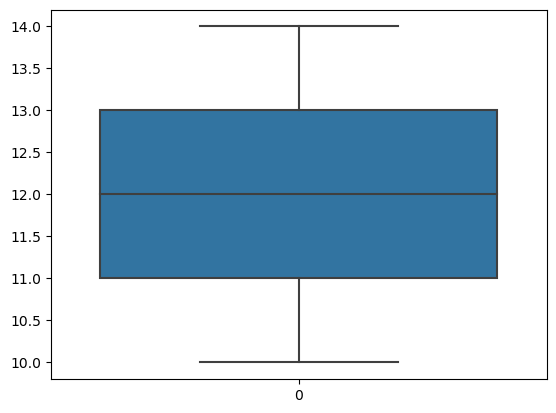

In [39]:
sns.boxplot(df['CURRENT_HOUSE_YRS'])

<Axes: >

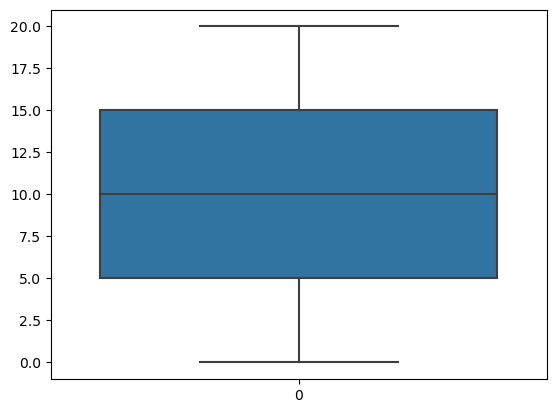

In [40]:
sns.boxplot(df['Experience'])

There are no outliers in the dataset

__<h1>Exploratory Data Analysis</h1>__

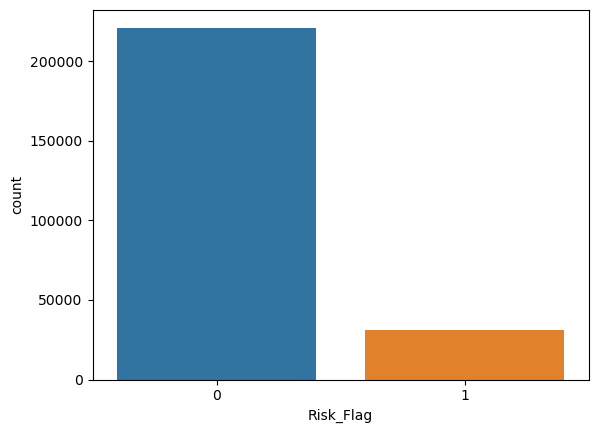

0    221004
1     30996
Name: Risk_Flag, dtype: int64


In [48]:
sns.countplot(df,x='Risk_Flag')
plt.xlabel("Risk_Flag")
plt.ylabel("count")
plt.show()
print(df['Risk_Flag'].value_counts())

Defaulter(1) is 30996 and Non-Defaulter(0) is 221004

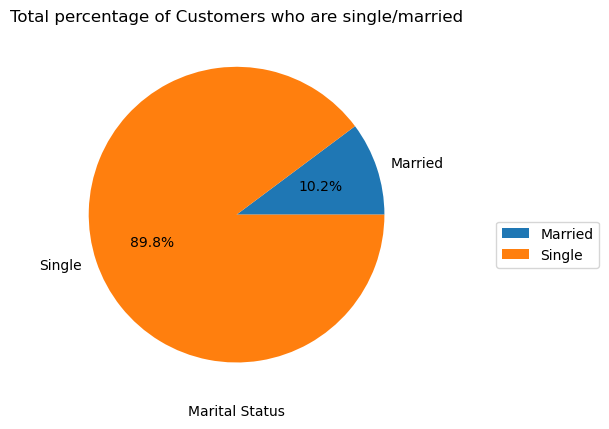

In [54]:
df.groupby('Married/Single').count()['Id'].plot(kind='pie',startangle=0,labels=['Married','Single'],autopct='%1.1f%%')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.title('Total percentage of Customers who are single/married')
plt.xlabel('Marital Status')
plt.ylabel('')
plt.show()

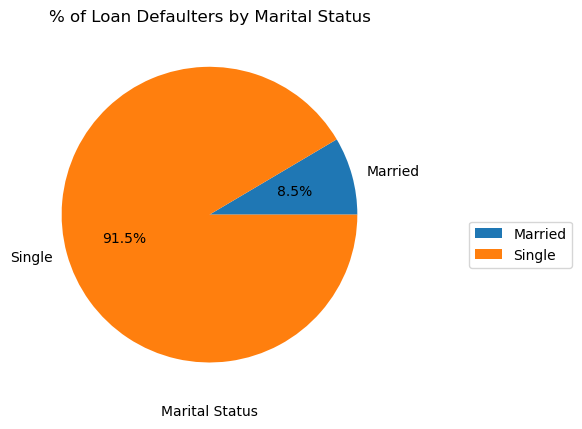

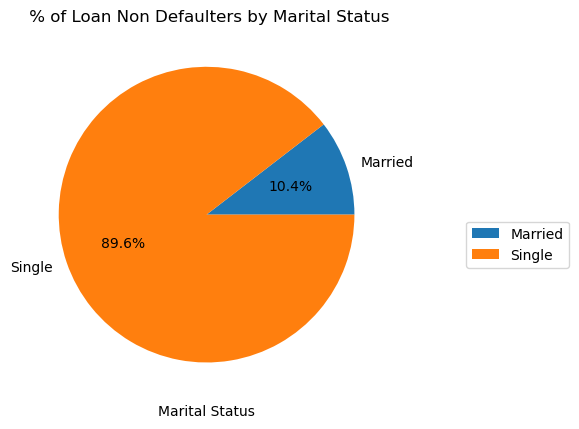

In [60]:
marital_status = df.loc[df['Risk_Flag']==1].groupby('Married/Single').count()['Id']
marital_status.plot(kind='pie',startangle=0,labels=['Married','Single'],autopct='%1.1f%%')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.xlabel('Marital Status')
plt.ylabel('')
plt.title('% of Loan Defaulters by Marital Status')
plt.show()
marital_status = df.loc[df['Risk_Flag']==0].groupby('Married/Single').count()['Id']
marital_status.plot(kind='pie',startangle=0,labels=['Married','Single'],autopct='%1.1f%%')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.xlabel('Marital Status')
plt.ylabel('')
plt.title(' % of Loan Non Defaulters by Marital Status')
plt.show()


91.5% are Single Loan Defaulter and 8.5% are Married Loan Defaulter

89.6% are Single Non loan defaulter and 8.5% are Married Non Loan Defaulter

In [63]:
df["Risk_Flag"][df["Risk_Flag"]==1].groupby(by=df["Married/Single"]).count()


Married/Single
married     2636
single     28360
Name: Risk_Flag, dtype: int64

In [64]:
df["Risk_Flag"][df["Risk_Flag"]==0].groupby(by=df["Married/Single"]).count()

Married/Single
married     23092
single     197912
Name: Risk_Flag, dtype: int64

In [65]:
house_ownership_count = df.groupby('House_Ownership').count()['Id']
house_ownership_count

House_Ownership
norent_noown      7184
owned            12918
rented          231898
Name: Id, dtype: int64

Text(0.5, 1.0, 'House Owwnership of all Customers')

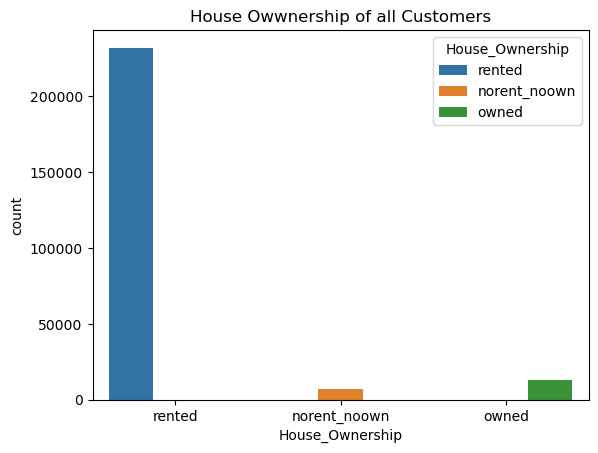

In [67]:
sns.countplot(x="House_Ownership",data= df,hue="House_Ownership")
plt.title("House Owwnership of all Customers")

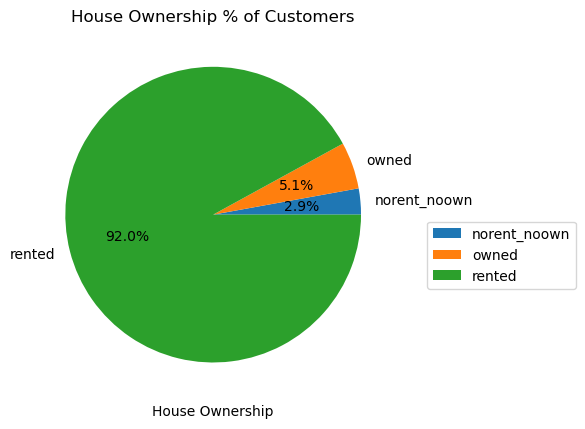

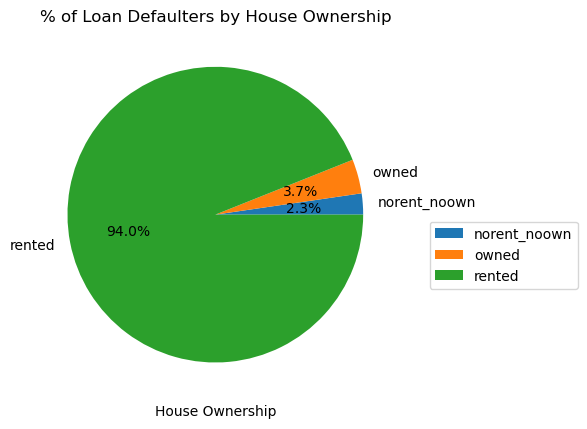

In [69]:
df.groupby('House_Ownership').count()['Id'].plot(kind='pie',startangle=0,autopct='%1.1f%%')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.title('House Ownership % of All Customers')
plt.xlabel('House Ownership')
plt.ylabel('')
plt.show()

df.loc[df['Risk_Flag']==1].groupby('House_Ownership').count()['Id'].plot(kind='pie',startangle=0,autopct='%1.1f%%')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.xlabel('House Ownership')
plt.ylabel('')
plt.title('% of Loan Defaulters by House Ownership')
plt.show()

Car_Ownership
no     176000
yes     76000
Name: Id, dtype: int64


Text(0.5, 1.0, 'Car Ownership of all Customers')

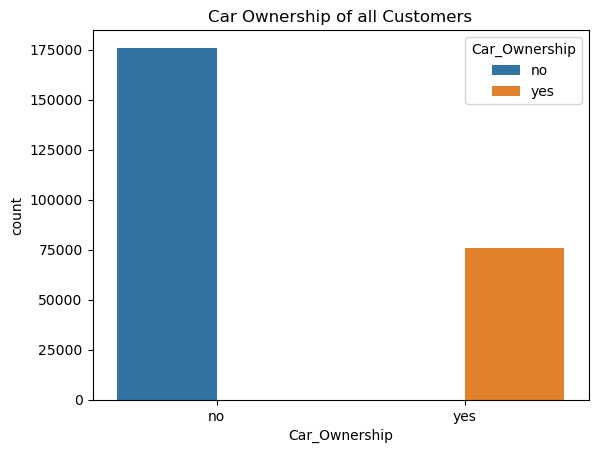

In [73]:
car_ownership_count = df.groupby('Car_Ownership').count()['Id']
print(car_ownership_count)
sns.countplot(x="Car_Ownership",data= df,hue="Car_Ownership")
plt.title("Car Ownership of all Customers")


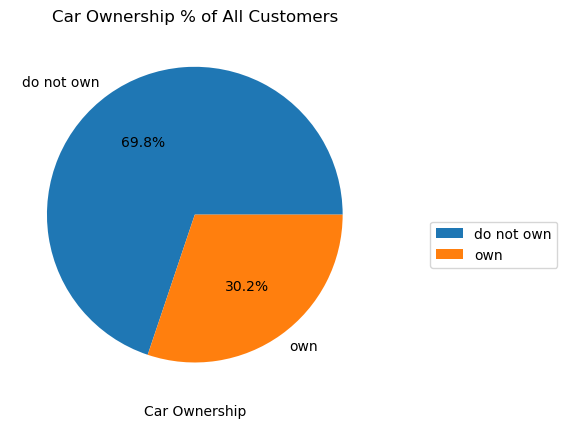

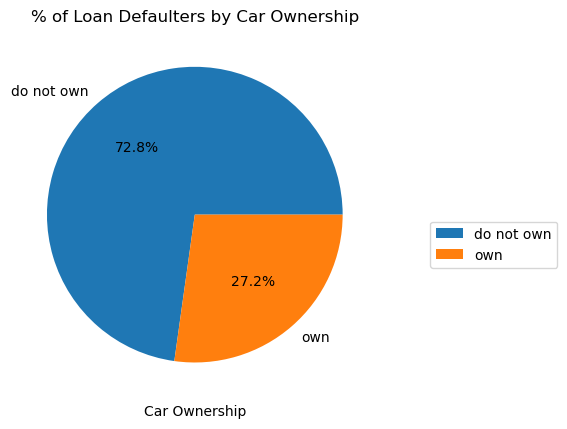

In [76]:
df.groupby('Car_Ownership').count()['Id'].plot(kind='pie',startangle=0,labels=['do not own','own'],autopct='%1.1f%%')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.title('Car Ownership % of All Customers')
plt.xlabel('Car Ownership')
plt.ylabel('')
plt.show()

df.loc[df['Risk_Flag']==1].groupby('Car_Ownership').count()['Id'].plot(kind='pie',startangle=0,labels=['do not own','own'],autopct='%1.1f%%')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.xlabel('Car Ownership')
plt.ylabel('')
plt.title('% of Loan Defaulters by Car Ownership')
plt.show()

In [79]:
df_1 = df.loc[df['Risk_Flag']==1].groupby(['STATE','Risk_Flag']).count()
df_1.rename(columns={'Id':'Total_Defaulters'}, inplace= True)
df_1.reset_index(inplace= True)
df_1[['STATE','Total_Defaulters']]

,STATE,Total_Defaulters
0,Andhra_Pradesh,2935
1,Assam,930
2,Bihar,2583
3,Chandigarh,61
4,Chhattisgarh,511
5,Delhi,574
6,Gujarat,1343
7,Haryana,980
8,Himachal_Pradesh,111
9,Jammu_and_Kashmir,283


In [80]:
df_2 =df.groupby('STATE').count()
df_2.rename(columns={'Id':'Total_Loans'},inplace= True)
df_2.reset_index(inplace= True)

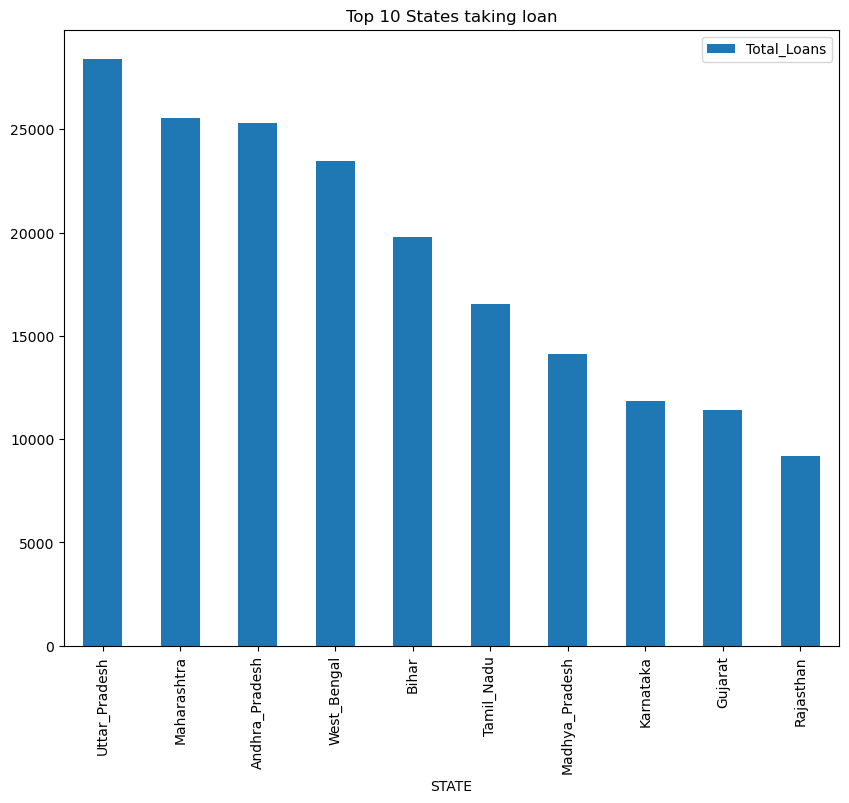

In [165]:
df_total_loans =df_2[['STATE','Total_Loans']].sort_values(by='Total_Loans',ascending= False)

top_10_df = df_total_loans.head(10)

top_10_df.plot(kind='bar',x='STATE',figsize=(10,8))
plt.title("Top 10 States taking loan")
plt.show()


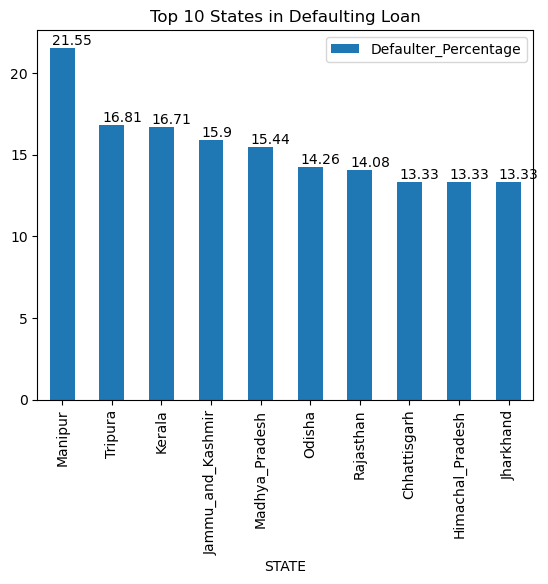

In [92]:
defaulter_percent_per_state = (df_1['Total_Defaulters']/df_2['Total_Loans']).round(4)*100
state_defaulters_percentage = pd.DataFrame(data= zip(df_1['STATE'],defaulter_percent_per_state),
                                          columns=['STATE','Defaulter_Percentage'])
df_dps = state_defaulters_percentage.sort_values(by='Defaulter_Percentage',ascending = False).head(10)
df_dps.plot(kind='bar',x='STATE')
for index,value in enumerate(df_dps['Defaulter_Percentage'][:10]):
    plt.text(index-0.2,value+0.2,str(round(value,2)))

plt.title("Top 10 States in Defaulting Loan")
plt.legend(loc='best')
plt.show()


In [103]:
df_3 = df.groupby('CITY').count()
df_3.rename(columns={'Id':'Total_Loans'},inplace= True)
df_3.reset_index(inplace= True)
df_3[['CITY','Total_Loans']]

,CITY,Total_Loans
0,Adoni,953
1,Agartala,809
2,Agra,1012
3,Ahmedabad,649
4,Ahmednagar,645
...,...,...
312,Vijayanagaram,1259
313,Vijayawada,1172
314,Visakhapatnam[4],971
315,Warangal[11][12],459


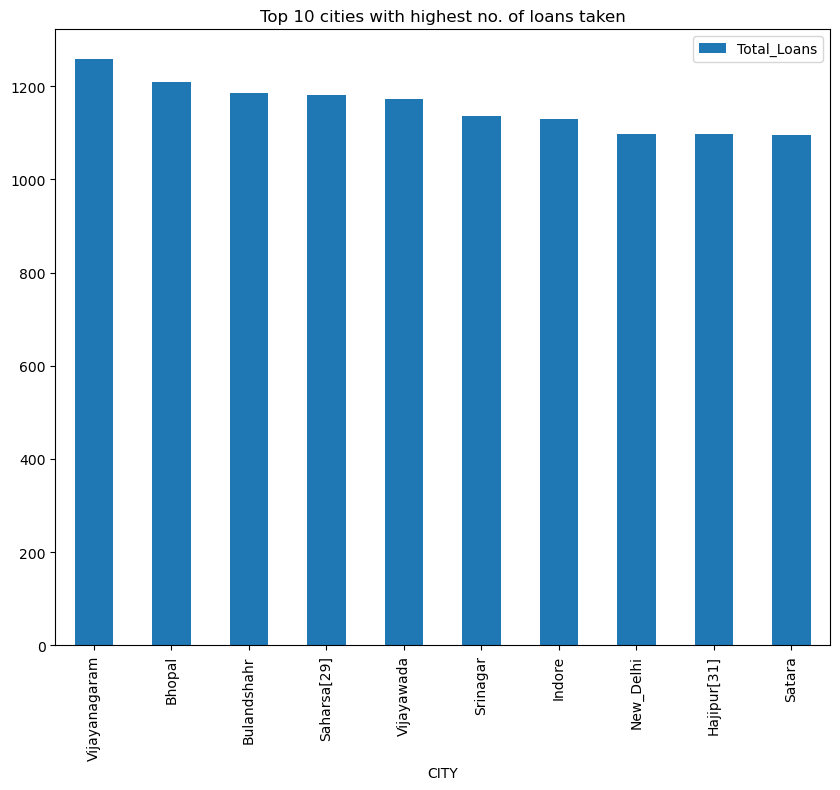

In [96]:
df3_total_loans =df_3[['CITY','Total_Loans']].sort_values(by='Total_Loans',ascending= False).head(10)

df3_total_loans.plot(kind='bar',x='CITY',figsize=(10,8))
plt.title("Top 10 cities with highest no. of loans taken")
plt.show()

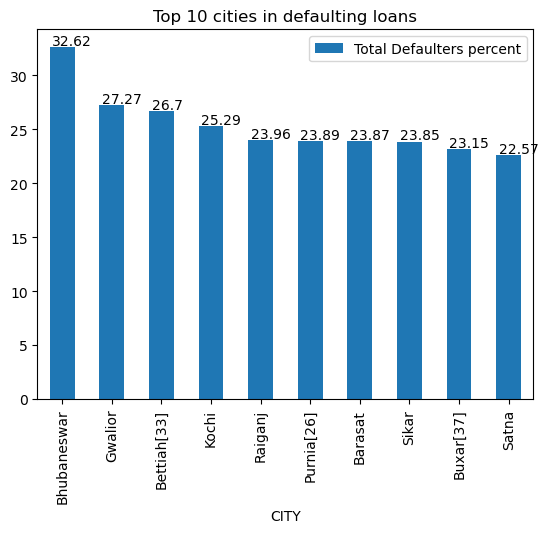

In [109]:
df_4= df.loc[df["Risk_Flag"]==1].groupby('CITY').count()
df_4.rename(columns={'Id':'Total Defaulters'},inplace= True)
df_4.reset_index(inplace=True)

defaulter_percent_per_city = (df_4['Total Defaulters']/df_3['Total_Loans']).round(4)*100
city_defaulters_percent = pd.DataFrame(data= zip(df_3['CITY'],defaulter_percent_per_city),
                                      columns=['CITY','Total Defaulters percent'])
df_dpc = city_defaulters_percent.sort_values(by='Total Defaulters percent',ascending= False).head(10)
df_dpc.plot(kind='bar',x='CITY')
for index,value in enumerate(df_dpc['Total Defaulters percent'][:10]):
    plt.text(index-0.2,value+0.2,str(round(value,2)))

plt.title("Top 10 cities in defaulting loans")
plt.show()


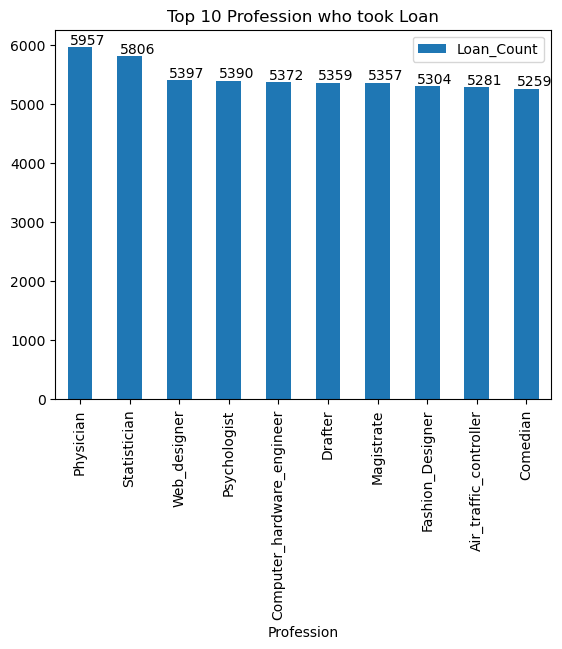

In [113]:
df_profession_loan_count = df.groupby('Profession').count()['Id'].sort_values(ascending= False)
df_plc = df_profession_loan_count.reset_index()
df_plc.rename(columns={'Id':'Loan_Count'},inplace= True)
df_plc[:10].plot(kind='bar',x='Profession')
for index,value in enumerate(df_plc['Loan_Count'][:10]):
    plt.text(index-0.2,value+50,str(round(value,2)))

plt.legend(loc='best')
plt.title('Top 10 Profession who took Loan')
plt.show()

__<h1>Resampling the Dataset</h1>__

Data contains    221004 Non defaulters and   30996 Defaulters so the Risk Flag is highly imbalanced.
This imbalance can pose problems as there can be bias towards majority class and lead to poor performance


In [118]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42,sampling_strategy=0.45)
X= df.iloc[:,:-1]
y= df['Risk_Flag']
X_ros, y_ros = ros.fit_resample(X, y)


In [119]:
from collections import Counter
print(Counter(y),Counter(y_ros))

Counter({0: 221004, 1: 30996}) Counter({0: 221004, 1: 99451})


In [131]:
df_ = pd.concat([X_ros,y_ros],axis=1)
df_

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320450,52447,9205302,77,13,single,rented,yes,Microbiologist,Deoghar,Jharkhand,11,13,1
320451,71795,140516,29,19,single,rented,no,Politician,Vellore,Tamil_Nadu,14,10,1
320452,37680,9763429,73,5,single,rented,no,Consultant,Tirupati[21][22],Andhra_Pradesh,5,11,1
320453,112479,6877905,40,9,single,rented,yes,Lawyer,Bulandshahr,Uttar_Pradesh,7,11,1


__<h1>Encoding the Categorical Data</h1>__

In [146]:
from sklearn.preprocessing import LabelEncoder
cols_to_encode = ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']
label_enconder = LabelEncoder()

for col in cols_to_encode:
    df_[col]= label_enconder.fit_transform(df_[col])

df_.isnull().sum()


Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [147]:

df_

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,3,0
1,7574516,40,10,1,2,0,43,227,14,9,3,0
2,3991815,66,4,0,2,0,47,8,12,4,0,0
3,6256451,41,2,1,2,1,43,54,17,2,2,1
4,5768871,47,11,1,2,0,11,296,22,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
320450,9205302,77,13,1,2,1,34,81,10,11,3,1
320451,140516,29,19,1,2,0,39,311,22,14,0,1
320452,9763429,73,5,1,2,0,15,298,0,5,1,1
320453,6877905,40,9,1,2,1,30,64,25,7,1,1


In [148]:
X= df_.iloc[:,:-1]
y=df_['Risk_Flag']

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.3,random_state=42)


__<h1>Various Model Evaluations and Predictions</h1>__ 

In [160]:
cf=RandomForestClassifier(n_estimators=50,criterion='gini',random_state=0)
cf.fit(X_train,y_train)
y_pred = cf.predict(X_test)


In [161]:
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 97.3176
Precision: 83.5412
F1-Score: 89.9047
Accuracy score: 93.2877
AUC Score: 94.4095


In [119]:
cf=KNeighborsClassifier(n_neighbors=7,weights='distance')
cf.fit(X_ros,y_ros)
y_pred=cf.predict(X_test)
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 59.5611
Precision: 45.939
F1-Score: 51.8706
Accuracy score: 86.4947
AUC Score: 74.9024


In [162]:
cf=DecisionTreeClassifier(random_state=0,criterion="gini")
cf.fit(X_train,y_train)
y_pred=cf.predict(X_test)
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 97.8155
Precision: 78.7034
F1-Score: 87.2248
Accuracy score: 91.2001
AUC Score: 93.0416


In [163]:
from xgboost import XGBClassifier
cf=XGBClassifier()
cf.fit(X_train,y_train)
y_pred=cf.predict(X_test)
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 65.5422
Precision: 80.4256
F1-Score: 72.2251
Accuracy score: 84.5179
AUC Score: 79.2357


Random Forest Classifier has shown highest Accuracy and XGB Classifier lowest